# Proyecto 6

In [1]:
import pandas as pd
import numpy as np

### Descripción de datos
- Name (Nombre)

- Platform (Plataforma)

- Year_of_Release (Año de lanzamiento)

- Genre (Género) 

- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

- EU_sales (ventas en Europa en millones de dólares estadounidenses) 

- JP_sales (ventas en Japón en millones de dólares estadounidenses) 

- Other_sales (ventas en otros países en millones de dólares estadounidenses) 

- Critic_Score (máximo de 100) 

- User_Score (máximo de 10) 

- Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

### Instrucciones para completar el proyecto

### Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo:

/datasets/games.csv

In [2]:
df = pd.read_csv("datasets/games.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Tenemos 2 nombres desconocidos, 269 años desconocidos, y muchos Critic y User y Rating scores desconocidos.

### Paso 2. Prepara los datos

- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
    - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [6]:
df.columns = [name.lower() for name in df.columns]

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- La columna years_of_release contiene los años de lanzamiento, pero es de tipo `float` ya que contiene NaN.
- La columna user_score contiene la calificación de los usuarios, es de tipo `object` cuando debería ser tipo `float`.

In [8]:
try:
    df['user_score'] = df['user_score'].astype('float')
except ValueError:
    print('There is a string in the Series you are trying to convert to a float')

There is a string in the Series you are trying to convert to a float


Tenemos un texto en nuestro `user_score`. Ese texto es `tbd` que son las siglas en inglés de `To Be Determined` o `Por Determinar`. Esto significa que todavía no había sido calificado por los usuarios al momento de obtener los datos, lo que a mi juicio es lo mismo que tener NaN, por lo que voy a reemplazar esos valores por NaN.

In [9]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)

Después de esta modificación, intentemos de nuevo convertir en `float` y veamos cuantos valores ausentes tenemos:

In [10]:
df['user_score'] = df['user_score'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [12]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Tenemos muchos valores faltantes en `critic_score`, `user_score` y `rating`. `critic_score` y `user_score` son columnas numéricas, los datos faltantes no los podemos saber. Al momento de hacer los cálculos podemos solo ignorar esas filas.
Para `rating`, que es una columna categórica, voy a analizarlo a más profundidad: veamos cuáles son los valores posibles, a lo mejor nos dará una pista:

In [13]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- E: everyone (todos)
- E10+: everyone 10+ (todos mayores a 10)
- T: teen (adolecentes)
- AO: adults only (solo adultos 18+)
- K-A: kids to adults (juegos con clasificación E pero que fueron lanzados antes de 1998, cuando cambió a E)
- EC: early childhood (mayores a 3 años, descontinuado en 2018 por poco uso, ahora son E)
- RP: rating pending (para aquellos juegos a los que todavía no se les da algún rating)

La clasificación `RP` parece la adecuada para los juegos en los que tenemos NaN. Esperaré a reemplazar esos datos hasta que los necesite, si es que lo necesito. Por lo general este rating se pone a juegos que todavía no salen al mercado, por lo que se podría confundir si hago el cambio.

Tenemos otras columnas con valores faltantes:
- year_of_release
- name
- genre

Coincide que `name` y `genre` tienen la misma cantidad de valores faltantes, voy a averiguar si coinciden las filas:

In [14]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Resulta que son las mismas filas, tampoco tenemos sus rating, ni sus scores, solo el año de lanzamiento y sus ventas. Es difícil saber qué juegos fueron a partir de estos datos, y son sólo 2 filas, por lo que voy a eliminarlas.

In [15]:
df = df.drop(index=df[df['name'].isna()].index)

In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Ahora sólo tengo años faltantes, veamos como se ven los juegos que no tienen año:

In [17]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Algunos de estos juegos tienen el año en su nombre, pero debería ser cuidadoso al usar esta información, por que es posible que los juegos hayan sido lanzados en un año diferente al que dice en su título. Mejor dejarlos así.

=============================================================================================

Veamos como se ven los títulos, podrían haber duplicados por que tienen un nombre distinto pero es el mismo juego.

In [18]:
sorted(df['name'].unique())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

In [19]:
len(df['name'].unique())

11559

Hay varios títulos que tienen espacios al principio, también podría haber títulos que solo discrepan en que las letras sean mayúsculas o minúsculas. Cambiemos todo a minúsculas y quitemos los espacios.
También podría haber guiones en algunos títulos y en otros no, pero ser el mismo título.

In [20]:
df['name'] = df['name'].str.strip().str.lower().str.replace('-',' ')

In [21]:
sorted(df['name'].unique())

["'98 koshien",
 '.hack//g.u. vol.1//rebirth',
 '.hack//g.u. vol.2//reminisce',
 '.hack//g.u. vol.2//reminisce (jp sales)',
 '.hack//g.u. vol.3//redemption',
 '.hack//infection part 1',
 '.hack//link',
 '.hack//mutation part 2',
 '.hack//outbreak part 3',
 '.hack//quarantine part 4: the final chapter',
 '.hack: sekai no mukou ni + versus',
 '007 racing',
 '007: quantum of solace',
 '007: the world is not enough',
 '007: tomorrow never dies',
 '1 vs. 100',
 '1/2 summer +',
 '10 minute solution',
 '100 all time favorites',
 '100 classic books',
 '100 classic games',
 '1000 cooking recipes from elle à table',
 '1001 touch games',
 '101 in 1 explosive megamix',
 '101 in 1 party megamix wii',
 '101 in 1 sports megamix',
 '101 in 1 sports party megamix',
 '1080°: teneighty snowboarding',
 '11eyes: crossover',
 '12 sai. honto no kimochi',
 '12 sai. koisuru diary',
 '12riven: the psi climinal of integral',
 '15 days',
 '1701 a.d.',
 '18 wheeler: american pro trucker',
 '18 wheels of steel: ext

In [22]:
len(df['name'].unique())

11556

=============================================================================================

Ahora veamos si hay duplicados

In [23]:
df.duplicated().sum()

np.int64(0)

No hay duplicados explícitos, pero puede haber duplicados implícitos. Un título puede ser considerado duplicado si tiene el mismo nombre, fue lanzado en la misma plataforma (ya que un título puede ser lanzado en varias plataformas y las ventas deberían de ponerse por separado) y el año de lanzamiento coincide (si el año de lanzamiento difiere, podría ser un re-make/re-master/etc., por lo que no sería lo mismo). Si coincide en todos, deberíamos de sumar las columnas de sus ventas antes de eliminar el duplicado.

In [24]:
df.duplicated(['name','platform','year_of_release']).sum()

np.int64(1)

Tenemos un solo caso, veamos cual es:

In [25]:
df[df.duplicated(['name','platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [26]:
df[(df['name'] == 'madden nfl 13') & (df['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [27]:
df.iloc[604,5] += 0.01

In [28]:
df = df.drop(index=16230)

In [29]:
df[(df['name'] == 'madden nfl 13') & (df['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


Nuestros datos ya están limpios

=============================================================================================

Para nuestro análisis más adelante nos convendría tener la venta total por juego, sumemos las 4 columnas de ventas y guardemos el resultado en una nueva columna:

In [30]:
df['total_sales'] = df.loc[:,'na_sales':'other_sales'].sum(axis=1)

In [31]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


También convendría pasar a una misma escala el `critic_score` y `user_score`

In [32]:
df['user_score'] *= 10

### Paso 3. Analiza los datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


In [33]:
import matplotlib.pyplot as plt

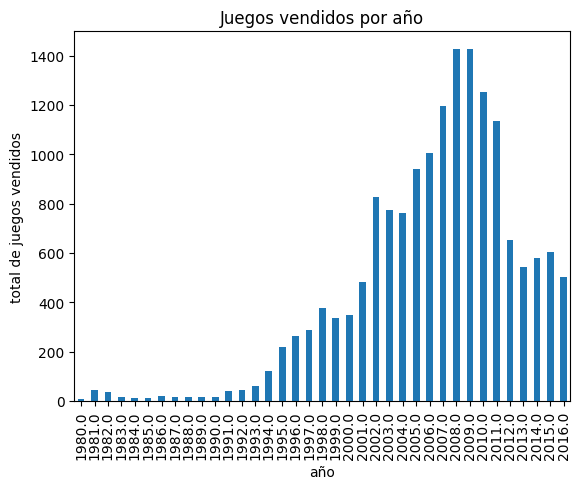

In [34]:
df.groupby('year_of_release')['name'].count().plot(kind='bar',title="Juegos vendidos por año",xlabel='año',ylabel='total de juegos vendidos')

plt.show()

Hay muy pocos juegos lanzados en la década de los 80, y en la década de los 90 va creciendo cada la cantidad de juegos lanzados.

- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


In [35]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

El mercado está dominado por la familia de consolas de `PlayStation`, si hacemos un gráfico con las 6 plataformas con mayores ventas en sus juegos, 3 de ellas son de `PlayStation` por lo que nos daría la idea de cómo `SONY` maneja sus ciclos de consola, y no de las otras compañías. Hagamos mejor un gráfico para cada una de las `familias de consolas` (por cada compañía), para eso primero voy a investigar de qué compñía es cada consola y haré una función para crear una nueva columna que nos indique la compañía a la que pertenese la consola.

In [36]:
def company_sort (rating):
    if rating in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:
        return "Nintendo"
    elif rating in ['PC']:
        return "PC"
    elif rating in ['PS','PS2','PS3','PS4','PSP','PSV']:
        return "PlayStation"
    elif rating in ['X360','XB','XOne']:
        return "XBox"
    else:
        return "Other"
        
df['company'] = df['platform'].apply(company_sort)

In [37]:
companies = ['Nintendo','XBox','PlayStation','Other']

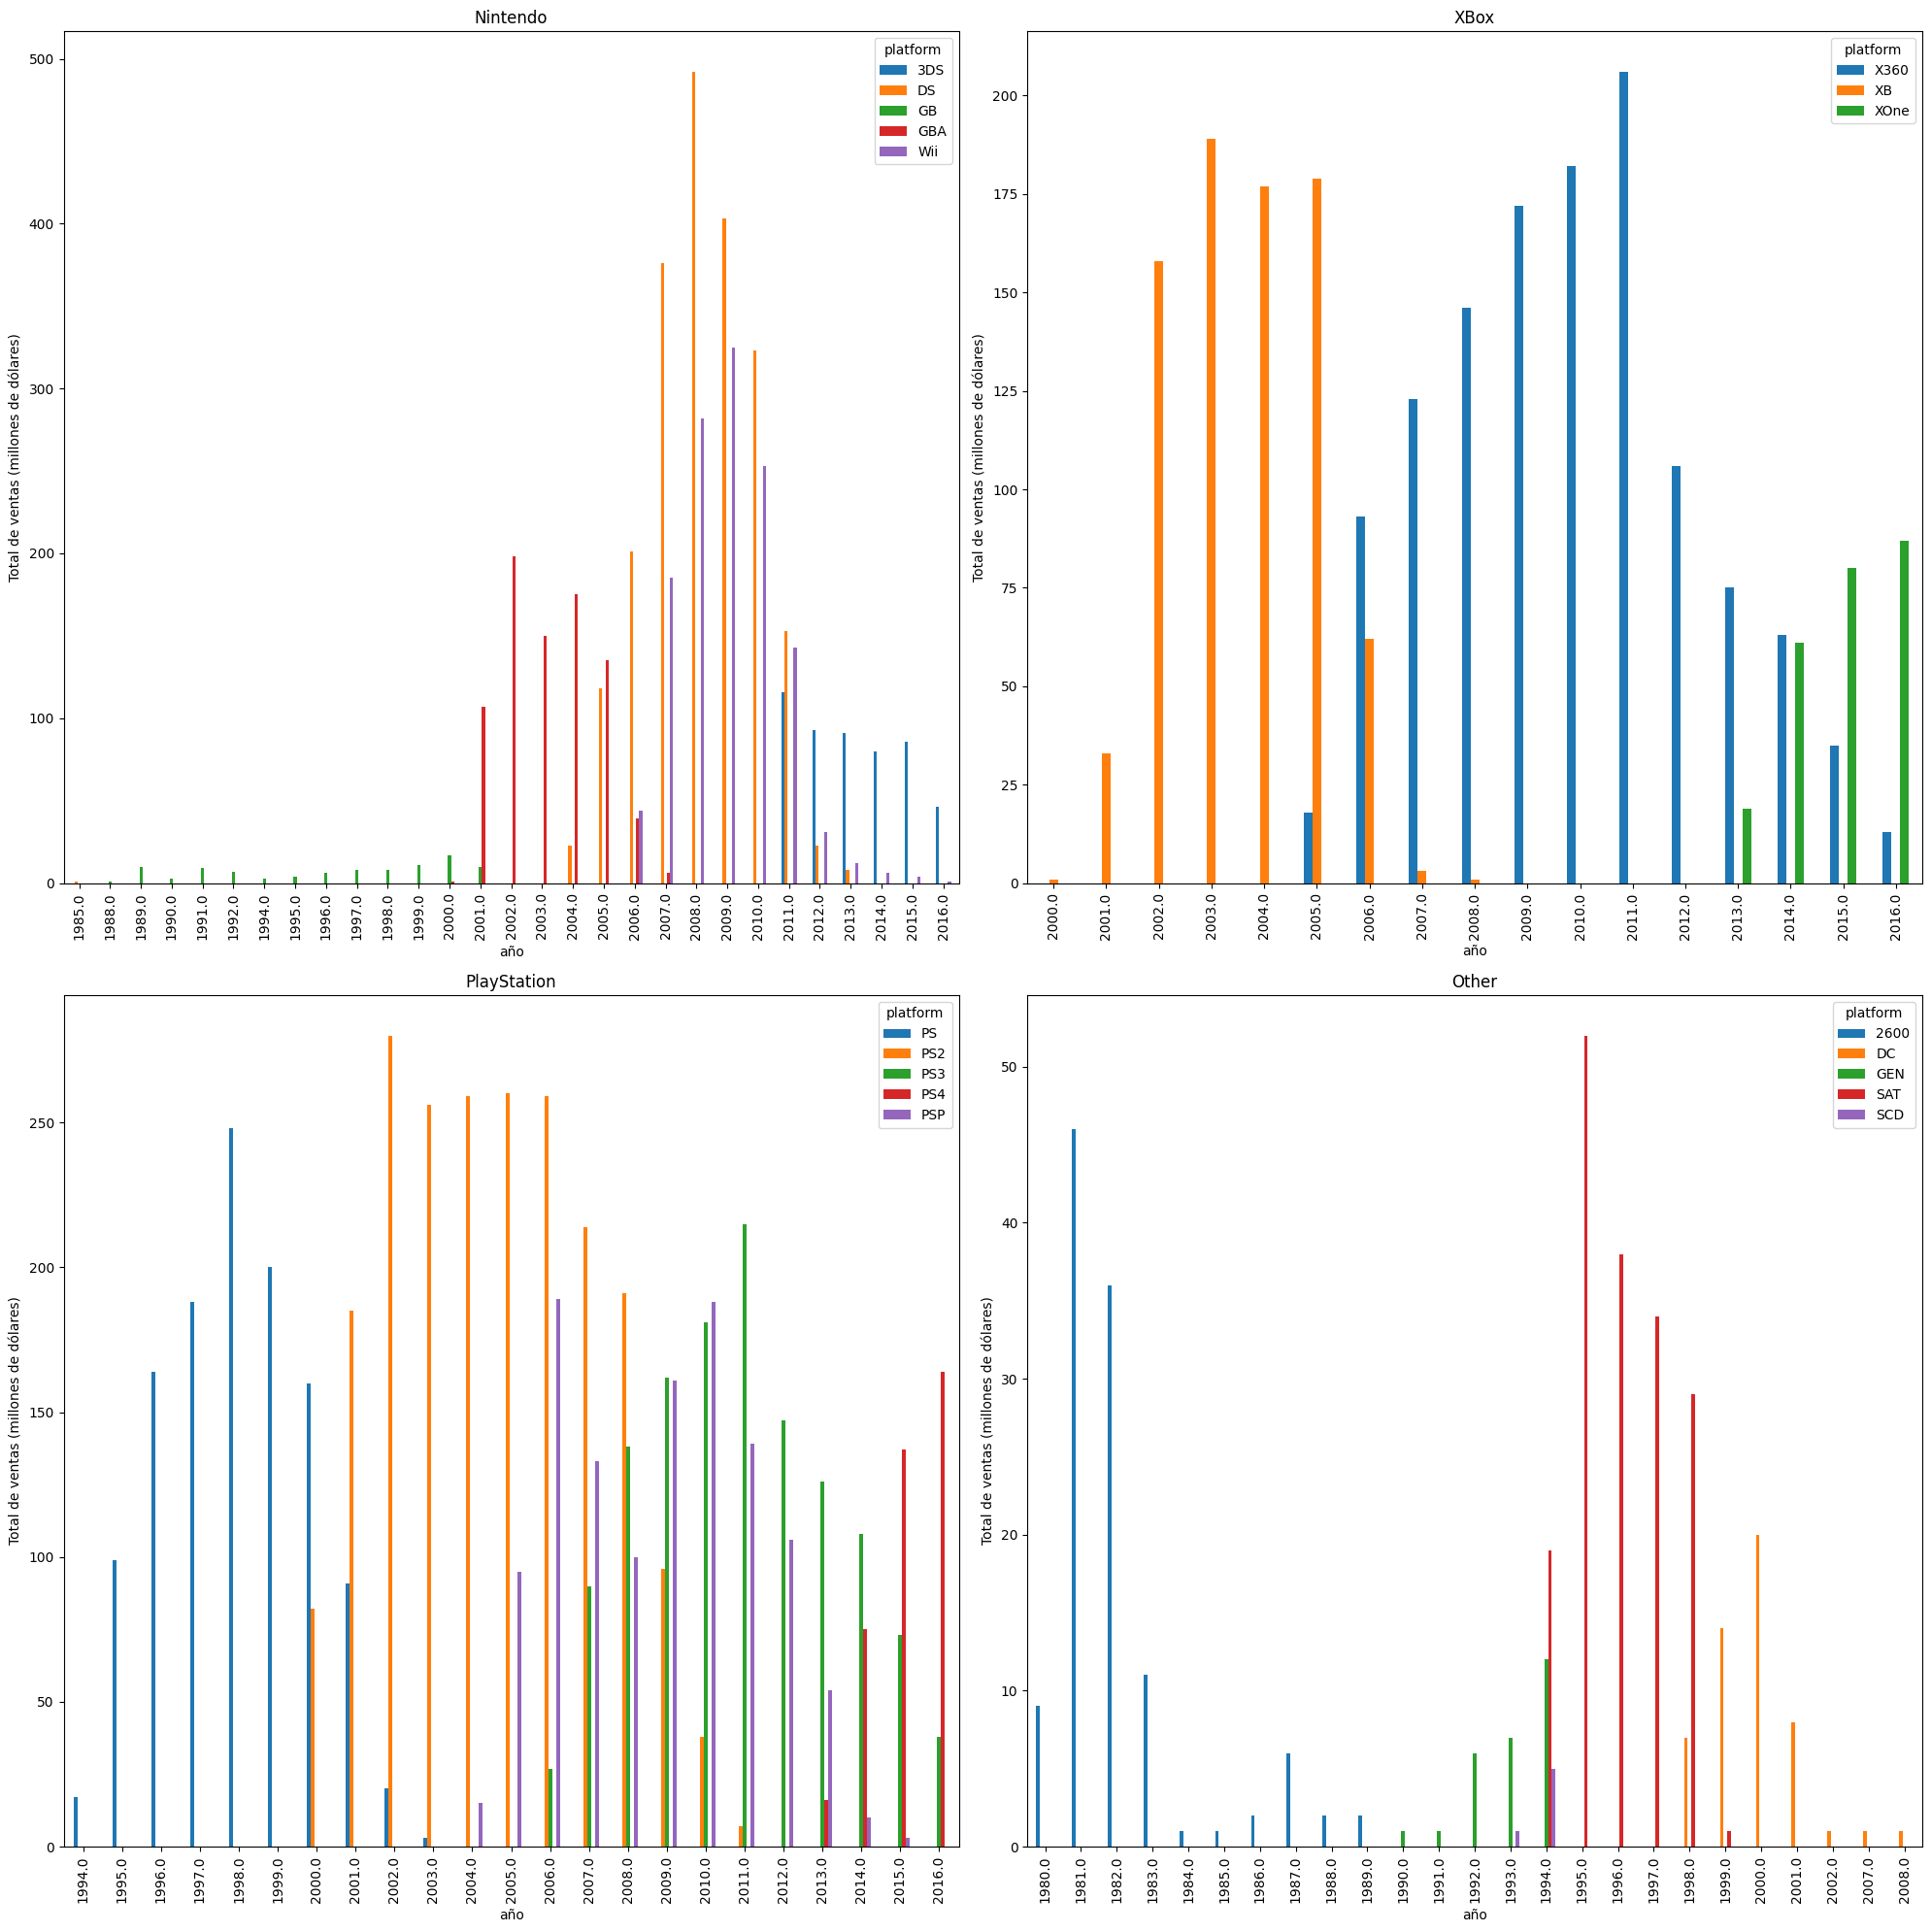

In [38]:
plt.figure(figsize=(20,20))
for i,company in enumerate(companies,start=1):
    plt.subplot(2,2,i)
    selected_platforms = df[df['company']==company].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index.to_list() #filtro por compañía y selecciono las 5 plataformas con más ventas en la compañía
    df_selected = df[df['year_of_release']!=np.nan].query('platform in @selected_platforms') #ignoro los juegos para los que no tengo información del año y filtro por las plataformas seleccionadas
    df_selected.pivot_table(values='name',index='year_of_release',columns='platform',aggfunc='count').plot(kind='bar',ax=plt.gca(),title=f"{company}",xlabel='año',ylabel='Total de ventas (millones de dólares)') #hago el barplot

plt.tight_layout()
plt.show()

Podemos ver que las plataformas (consolas) tienen un ciclo de alrededor de 10 años, alcanzando sus ventas máximas alrededor de la mitad, teniendo una distribución de ventas parecida a una normal.

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.


Observando que las consolas tienen un periodo de vida de alrededor de 10 años (máximo unos 15), podríamos tomar datos a partir del inicio del milenio para darnos una idea para lo que sucederá en 2017.

- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.


In [39]:
df_2000 = df[df['year_of_release'] >= 2000]

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.


In [40]:
df_2000.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sales, dtype: float64

Los lideres en ventas son PS2, X360, PS3, Wii y DS, en ese orden. Pero el ciclo de las nuevas plataformas apenas está empezando, esto es PS4, XOne y WiiU.

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


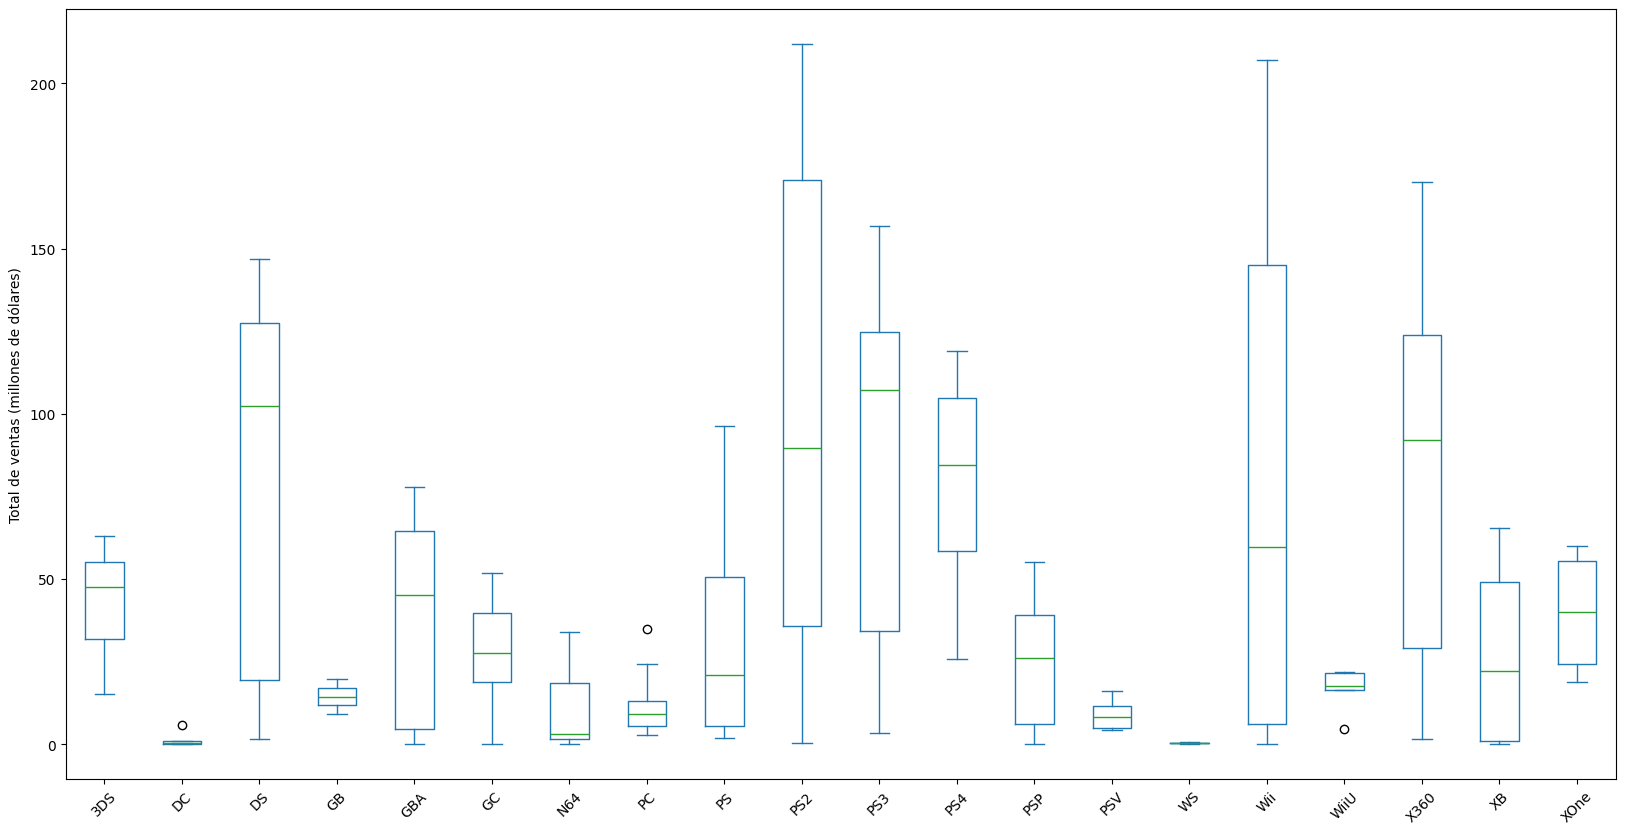

In [41]:
df_2000.pivot_table(values='total_sales',index='year_of_release',columns='platform',aggfunc='sum').plot(kind='box',rot=45,figsize=(20,10),ylabel="Total de ventas (millones de dólares)")
plt.show()

Hay mucha varianza en las ventas de las plataformas más exitosas, por obvias razones:
- Como todas las plataformas, empiezan con muy pocas ventas.
- Como son exitosas, rápidamente suben mucho sus ventas.
- Por lo general, para estas plataformas ya pasó su ciclo de vida, por lo que otra vez disminuyen sus ventas, por eso hay tanta varianza.


Para otras consolas que no fueron tan exitosas o apenas comienzan su ciclo de vida, la varianza es mucho menor.

El caso de la `PC` es muy diferente a los demás. Las consolas se vuelven viejas y sale una nueva generación de consola, y sus ventas las ponemos otra vez en otra categoría. Pero las computadoras son tan diversas, cada vez están saliendo nuevos componentes y nuevas laptops y gabinetes, pero la clasificación del juego lanzado para PC nunca va a cambiar. En cierta forma, la `PC` es la consola con el ciclo de vida más largo.

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.


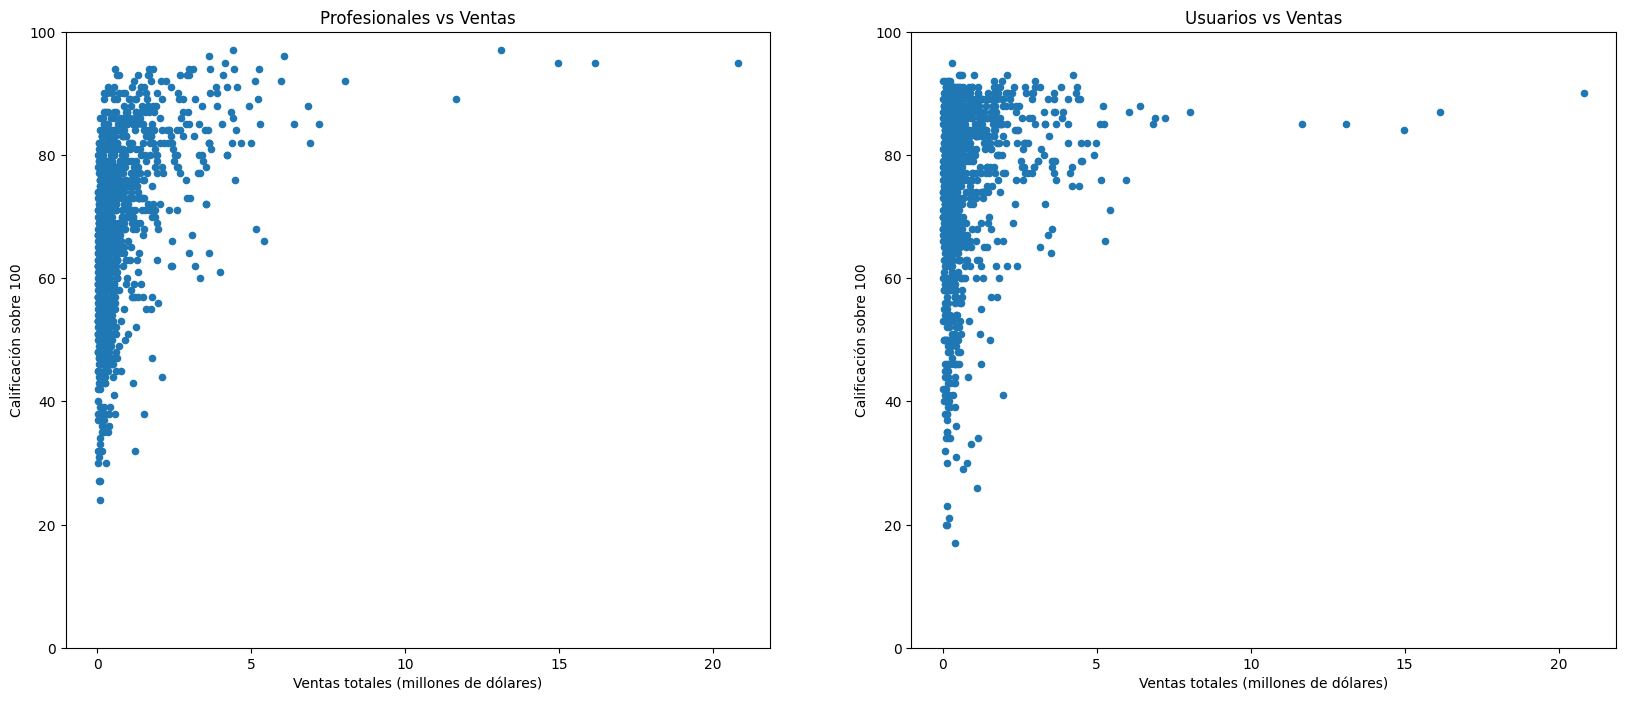

In [42]:
df_ps2 = df[df['platform']=='PS2']

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
df_ps2.plot(kind='scatter',y='critic_score',x='total_sales',ax=plt.gca(),ylabel='Calificación sobre 100',xlabel='Ventas totales (millones de dólares)',title='Profesionales vs Ventas',ylim=(0,100))
plt.subplot(1,2,2)
df_ps2.plot(kind='scatter',y='user_score',x='total_sales',ax=plt.gca(),ylabel='Calificación sobre 100',xlabel='Ventas totales (millones de dólares)',title='Usuarios vs Ventas',ylim=(0,100))

plt.show()

Se ve que sí hay cierta correlación entre ventas y reseñas. Mientras más alta la reseña, hay más puntos cada vez más hacia la derecha. Aunque la mayoría de los juegos siguen estando con relativamente pocas ventas no importa su reseña. Veamos que dicen los números:

In [43]:
df_ps2['critic_score'].corr(df_ps2['total_sales'])

np.float64(0.39543454945454865)

In [44]:
df_ps2['user_score'].corr(df_ps2['total_sales'])

np.float64(0.17286551112058185)

Hay mucho menos correlación con las reseñas de los usuarios que con las reseñas de los profesionales. Es una correlación débil, pero si la hay.

- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.


In [45]:
columns = ['name','platform','total_sales','total_sales_ps2','critic_score','user_score','critic_score_ps2','user_score_ps2']

In [46]:
df_same_games = df.merge(df_ps2,how='right',on='name',suffixes=[None,'_ps2'])[columns]

Voy a seleccionar los 10 juegos con más versiones en distintas plataformas:

In [47]:
top_10_different_platforms = df_same_games['name'].value_counts().sort_values(ascending=False).head(10)
top_10_different_platforms

name
need for speed: most wanted                12
ratatouille                                 9
madden nfl 07                               9
monopoly                                    8
cars                                        8
lego star wars ii: the original trilogy     8
madden nfl 08                               8
xgra: extreme g racing association          8
tomb raider: legend                         7
spider man 3                                7
Name: count, dtype: int64

In [48]:
top_10_different_platforms = top_10_different_platforms.index
top_10_different_platforms

Index(['need for speed: most wanted', 'ratatouille', 'madden nfl 07',
       'monopoly', 'cars', 'lego star wars ii: the original trilogy',
       'madden nfl 08', 'xgra: extreme g racing association',
       'tomb raider: legend', 'spider man 3'],
      dtype='object', name='name')

In [49]:
df_top_10 = df_same_games.query("name in @top_10_different_platforms")

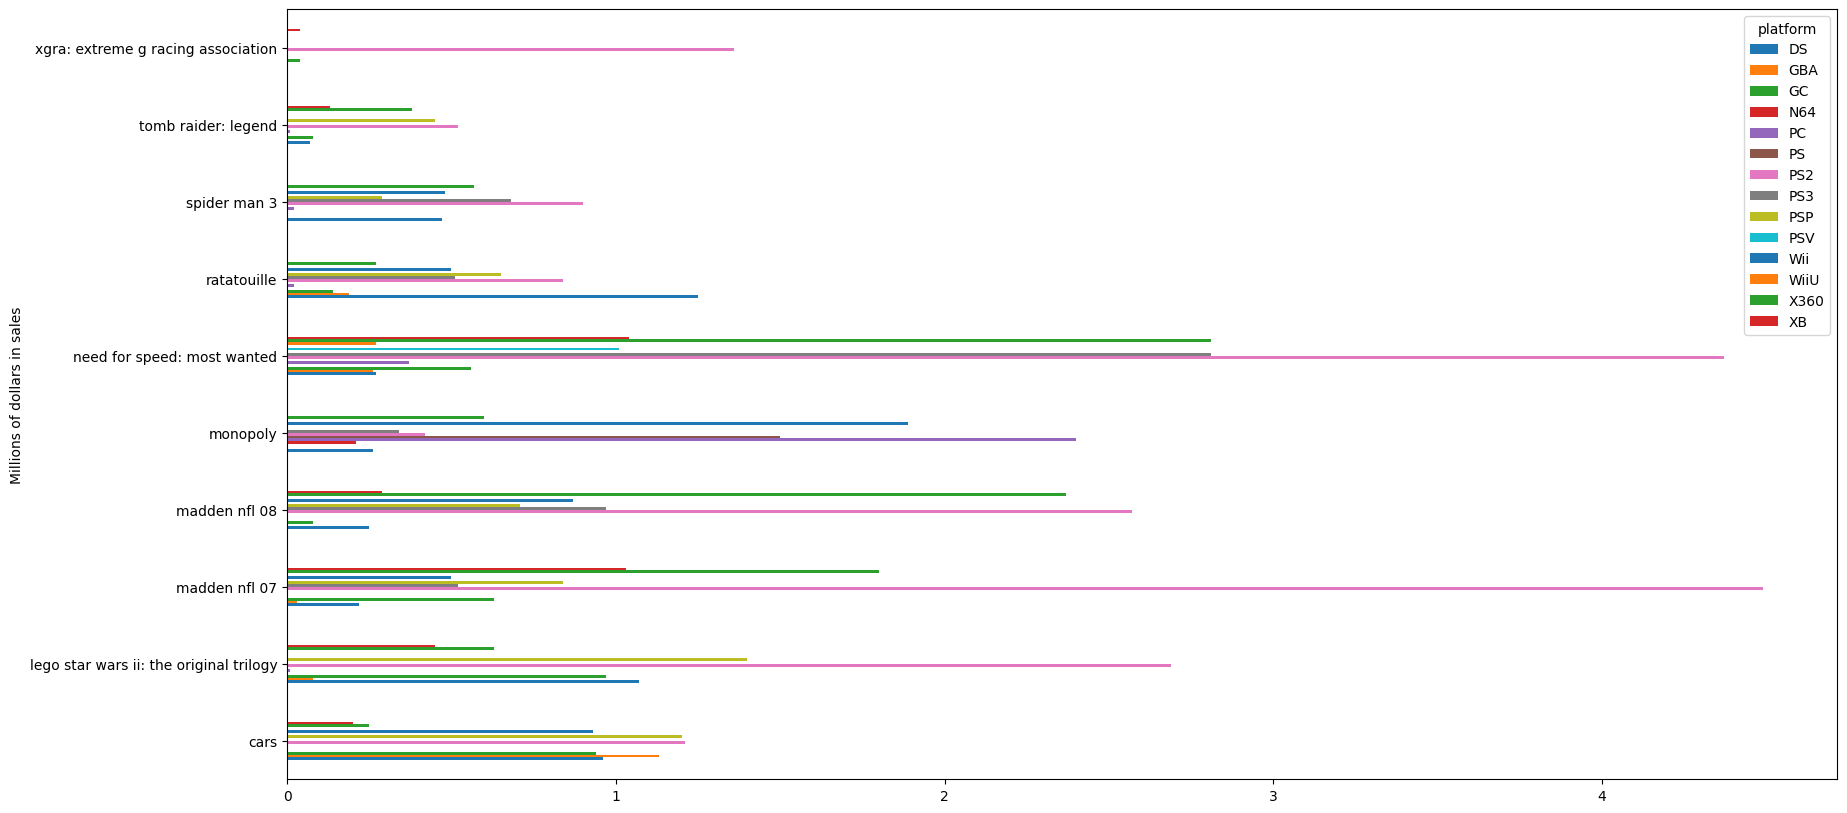

In [50]:
df_top_10.pivot_table(values='total_sales',index='name',columns='platform',aggfunc='sum').plot(kind='barh',figsize=(20,10),ylabel='Millions of dollars in sales')

plt.show()

Vemos como en casi todas, el `PS2` es donde ha tenido más ganancia. Pero coincide que mientras más alto está en PS2, por lo general las otras ventas también están más altas comparando con otros juegos.
La exepción es `monopoly` que por alguna razón en el `PS2` tuvo malas ventas y `xgra: extreme g raciong association` en donde el `PS2` es la única plataforma que tuvo buenas ventas.

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

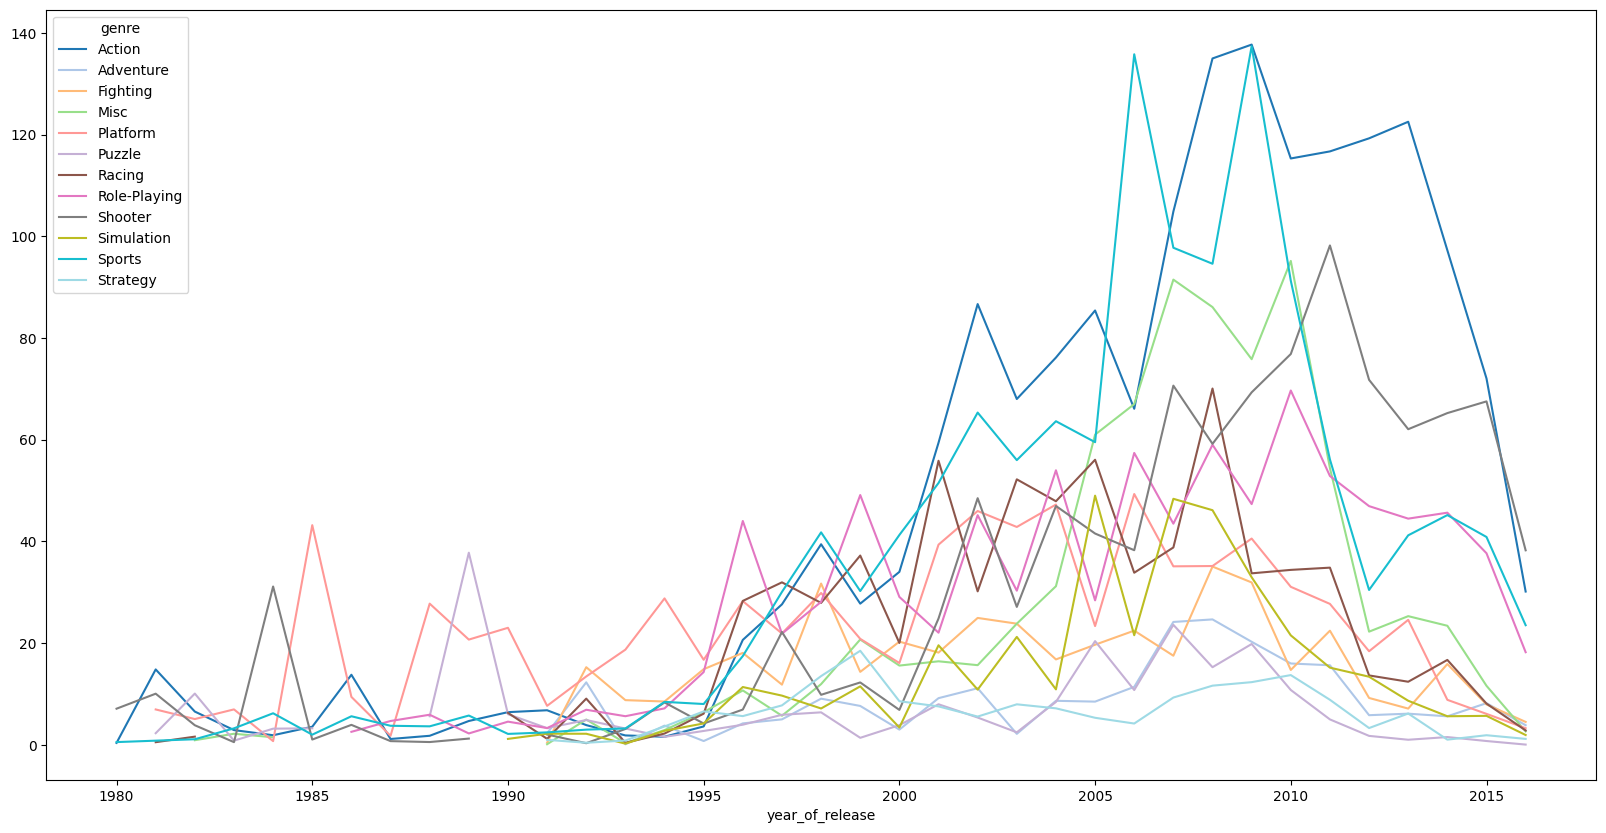

In [51]:
df.pivot_table(values='total_sales',index='year_of_release',columns='genre',aggfunc='sum').plot(kind='line',figsize=(20,10),colormap='tab20')

plt.show()

    - Los juegos de estrategia nunca han vendido mucho, al igual que los de simulación.
    - Los juegos de RPG fueron muy populares alrededor de 1995, pero en general están en el promedio
    - Los más vendidos desde el 2000 han sido los de acción y deportes, seguidos por los de tipo shooter.
    - Pero en los 80's y 90's los más populares fueron los de plataforma. Cerca de 1985 también hubo un pico de popularidad de shooter, y cerca de 1990 los juegos de puzzle eran muy populares, superando incluso a los de plataforma.

### Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:



#### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.


##### Norteamérica

In [52]:
top_platforms_na = df_2000.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_platforms_na

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Estas son las 5 marcas principales de Norteamérica, veamos qué porcentaje representa.

In [53]:
top_platforms_na/df_2000['na_sales'].sum()*100

platform
X360    16.878352
PS2     16.231822
Wii     13.793875
PS3     11.053063
DS      10.774845
Name: na_sales, dtype: float64

In [54]:
(top_platforms_na/df_2000['na_sales'].sum()*100).sum()

np.float64(68.73195622179222)

- X360  ->  16.88%
- PS2   ->  16.23%
- Wii   ->  13.79%
- PS3   ->  11.05%
- DS    ->  10.77%
- Suma  ->  68.73% del total de ventas de toda la región

##### Europa

In [55]:
top_platforms_eu = df_2000.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_platforms_eu

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
DS      188.41
Name: eu_sales, dtype: float64

Estas son las 5 marcas principales de Europa, veamos qué porcentaje representa.

In [56]:
top_platforms_eu/df_2000['eu_sales'].sum()*100

platform
PS2     15.948811
PS3     15.688935
X360    12.865301
Wii     12.385825
DS       9.033808
Name: eu_sales, dtype: float64

In [57]:
(top_platforms_eu/df_2000['eu_sales'].sum()*100).sum()

np.float64(65.92267969562862)

- PS2   ->  15.95%
- PS3   ->  15.69%
- X360  ->  12.87%
- Wii   ->  12.39%
- DS    ->   9.03%
- Suma  ->  65.92%

Interesante que X360 domine el mercado Norteamericano, en cambio en Europa baja hasta atrás de los PlayStation. También el mercado en Europa es un poco más variado, el top 5 abarca menos porcentaje del total de ventas comparado con NA.

##### Japón

In [58]:
top_platforms_jp = df_2000.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
top_platforms_jp

platform
DS     175.00
PS2    137.54
3DS    100.62
PS3     79.41
PSP     75.88
Name: jp_sales, dtype: float64

Estas son las 5 marcas principales de Japón, veamos qué porcentaje representa.

In [59]:
top_platforms_jp/df_2000['jp_sales'].sum()*100

platform
DS     21.450810
PS2    16.859111
3DS    12.333603
PS3     9.733765
PSP     9.301071
Name: jp_sales, dtype: float64

In [60]:
(top_platforms_jp/df_2000['jp_sales'].sum()*100).sum()

np.float64(69.67836042264224)

- DS    ->  21.45%
- PS2   ->  16.86%
- 3DS   ->  12.33%
- PS3   ->   9.73%
- PSP   ->   9.30%
- Suma  ->  69.68%

El mercado japonés es totalmente diferente a los otros 2 mercados. Nintendo tiene dominado el mercado con sus productos DS y 3DS, le sigue PlayStation (hasta aparece el PSP) y no hay rastro alguno de X360. Es interesante que 3 de los top 5 sean consolas portatiles.

#### Los cinco géneros principales. Explica la diferencia.


In [61]:
df_2000.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()/df_2000['na_sales'].sum()*100

genre
Action          21.313120
Sports          16.698445
Shooter         14.030729
Misc            10.348735
Role-Playing     7.998051
Name: na_sales, dtype: float64

In [62]:
df_2000.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()/df_2000['eu_sales'].sum()*100

genre
Action     22.371393
Sports     16.282047
Shooter    14.097554
Misc        9.431773
Racing      9.206899
Name: eu_sales, dtype: float64

In [63]:
df_2000.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()/df_2000['jp_sales'].sum()*100

genre
Role-Playing    29.627859
Action          16.208232
Misc            10.471673
Sports           9.301071
Platform         6.774779
Name: jp_sales, dtype: float64

El mercado europeo y norteamericano se comportan de manera muy similar, la unica diferencia es el género que está en 5to lugar, para NA es Role-Playing y para EU es Racing.

El mercado japonés una vez más se comporta muy distinto. Role-Playing es su género más popular, mientras en NA está en 5to lugar y en EU no está en el top 5. Aunque Action sigue estando bastante arriba, en el 2do lugar comparado con el 1er lugar en las otras 2 regiones.

#### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [64]:
df_2000.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()/df_2000[~df_2000['rating'].isna()]['na_sales'].sum()*100

rating
E       41.158931
M       23.978571
T       23.387509
E10+    11.383067
EC       0.050408
Name: na_sales, dtype: float64

In [65]:
df_2000.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()/df_2000[~df_2000['rating'].isna()]['eu_sales'].sum()*100

rating
E       39.694793
M       27.152546
T       22.572135
E10+    10.537418
AO       0.035062
Name: eu_sales, dtype: float64

In [66]:
df_2000.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()/df_2000[~df_2000['rating'].isna()]['jp_sales'].sum()*100

rating
E       45.328910
T       31.270288
M       13.805614
E10+     9.595188
AO       0.000000
Name: jp_sales, dtype: float64

En japón disminuyen considerablemente las ventas de juegos con rating "M" comparado con el resto del mundo. En cambio en Europa los juegos "M" tienen mayor porcentaje (comparado con las otras 2 regiones) del total de ventas.

In [67]:
import scipy.stats as st

### Paso 5. Prueba las siguientes hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

- Cómo formulaste las hipótesis nula y alternativa.

- Qué criterio utilizaste para probar las hipótesis y por qué.

En ambos casos queremos ver si ambas poblaciones tienen el mismo promedio o no. Para eso hay 2 pruebas, una es el T-Test y el otro es Mann-WhitneyU. El `T-Test` lo podemos usar sólo si ambas poblaciones siguen una distribución de tipo normal y homoscedasticitidad (varianzas iguales). Si no es así, tendremos que ver si siguen la misma distribución (por lo tanto tener la misma media) con la prueba `Mann-WhitneyU`.

Para probar si una población tiene una distribución normal, podemos usar el test `shapiro`. Y para la homoscedasticitidad de dos poblaciones podemos usar el test `levene`.

In [93]:
def test_normality(data):
    statistic, p_value = st.shapiro(data)
    print(f"p-value:{p_value:.6f}")
    if p_value < 0.05:
        print("Rechazamos la hipotesis nula -> Los datos no están distribuidos normalmente.")
    else:
        print("No se puede rechazar la hipotesis nula -> Aceptamos que los datos están distribuidos normalmente.")

$H_0$: Los datos están distribuidos normalmente.\
$H_1$: Los datos no están distribuidos normalmente.\
$\alpha=0.05$ Si el $p-value > 0.05$ aceptamos la hipótesis nula, sino, la tenemos que rechazar.

In [96]:
def test_homoscedasticity(data1,data2):
    statistic, p_value = st.levene(data1,data2)
    print(f"p-value:{p_value:.6f}")
    if p_value < 0.05:
        print("Rechazamos la hipotesis nula -> Los datos no tienen homoscedasticitidad.")
    else:
        print("No se puede rechazar la hipotesis nula -> Aceptamos que los datos tienen homoscedasticitidad.")

$H_0$: Los datos tienen la misma varianza.\
$H_1$: Los datos no tienen la misma varianza.\
$\alpha=0.05$ Si el $p-value > 0.05$ aceptamos la hipótesis nula, sino, la tenemos que rechazar.

Obtenemos los datos de las calificaciones de los usuarios para las plataformas Xbox One y PC de todo el dataset, pero sólo para aquellos títulos de los que tengamos una calificación de usuario.\
Apliquemos los tests.

In [76]:
cal_promedio_usuario_XOne = df[(df['platform']=='XOne')&(~df['user_score'].isna())]['user_score']
cal_promedio_usuario_PC = df[(df['platform']=='PC')&(~df['user_score'].isna())]['user_score']

In [94]:
test_normality(cal_promedio_usuario_XOne)

p-value:0.000015
Rechazamos la hipotesis nula -> Los datos no están distribuidos normalmente.


In [95]:
test_normality(cal_promedio_usuario_PC)

p-value:0.000000
Rechazamos la hipotesis nula -> Los datos no están distribuidos normalmente.


In [97]:
test_homoscedasticity(cal_promedio_usuario_XOne,cal_promedio_usuario_PC)

p-value:0.269395
No se puede rechazar la hipotesis nula -> Aceptamos que los datos tienen homoscedasticitidad.


No siguen una distribución normal, pero sí tienen una varianza igual. Apliquemos el test `Mann-WhitneyU` para verificar si nuestros datos vienen de la misma distribución, y por lo tanto tendrían la misma media:

In [98]:
statistic, p_value = st.mannwhitneyu(cal_promedio_usuario_XOne,cal_promedio_usuario_PC)

In [99]:
p_value

np.float64(1.2410720835179343e-08)

$H_0$: Los datos vienen de una misma distribución, por lo tanto tienen misma media.\
$H_1$: Los datos no vienen de una misma distribución, pero tienen la misma varianza, por lo tanto no tienen la misma media.\
Nuestro $p-value$ es menor que $\alpha=0.05$, por lo tanto rechazamos la hipótesis nula y aceptamos la hipótesis alternativa -> Nuestros datos no tienen la misma media.

La razón por la que escogí el valor de $\alpha=0.05$ es por que no necesito un nivel de exigencia muy alto. Hasta donde tengo información, es aceptable equivocarse en el 5% de los casos. Aunque si hubiera escogido el valor de $\alpha=0.01$, aún así debería rechazar la hipótesis nula, ya que el p-value es todavía menor que eso.\
Voy a escoger el mismo alpha para el siguiente conjunto de datos.

Obtenemos las calificaciones de los usuarios para los géneros de Acción y Deportes

In [102]:
cal_promedio_usuario_accion = df[(df['genre']=='Action')&(~df['user_score'].isna())]['user_score']
cal_promedio_usuario_accion

16       82.0
17       90.0
23       81.0
24       87.0
38       85.0
         ... 
16652    85.0
16654    51.0
16660    67.0
16663    24.0
16692    76.0
Name: user_score, Length: 1830, dtype: float64

In [103]:
cal_promedio_usuario_deportes = df[(df['genre']=='Sports')&(~df['user_score'].isna())]['user_score']
cal_promedio_usuario_deportes

0        80.0
3        80.0
13       77.0
15       74.0
77       43.0
         ... 
16450    45.0
16518    14.0
16528    69.0
16546    95.0
16643    66.0
Name: user_score, Length: 1102, dtype: float64

Verifiquemos si son datos que siguen una distribución normal:

In [104]:
test_normality(cal_promedio_usuario_accion)

p-value:0.000000
Rechazamos la hipotesis nula -> Los datos no están distribuidos normalmente.


In [105]:
test_normality(cal_promedio_usuario_deportes)

p-value:0.000000
Rechazamos la hipotesis nula -> Los datos no están distribuidos normalmente.


No están distribuidos normalmente, verifiquemos sus varianzas.

In [106]:
test_homoscedasticity(cal_promedio_usuario_deportes,cal_promedio_usuario_accion)

p-value:0.000186
Rechazamos la hipotesis nula -> Los datos no tienen homoscedasticitidad.


También tienen distintas varianzas, pero es posible que nos equivoquemos en el 1.86% de las veces.\
Apliquemos el test `Mann-WhitneyU`.

In [107]:
statistic, p_value = st.mannwhitneyu(cal_promedio_usuario_accion,cal_promedio_usuario_deportes)

In [108]:
p_value

np.float64(0.7404840524626071)

$H_0$: Los datos vienen de una misma distribución, por lo tanto tienen misma media.\
$H_1$: Los datos no vienen de una misma distribución, por lo tanto no tienen la misma media.\
Nuestro $p-value$ es mayor que $\alpha=0.05$, por lo tanto no tenemos los datos necesarios para rechazar la hipótesis nula -> asumimos que siguen la misma distribución, y por lo tanto tienen la misma media.

Es interesante cómo los géneros de Acción y Deportes tienden a tener las misma calificaciónes por los usuarios. Tal vez los desarrolladores se esfuerzan bastante en hacer que esos juegos sean buenos, ya que si es buen juego vende mucho, ya que son los dos géneros que más popularidad tienen en casi todo el mundo.